<a href="https://colab.research.google.com/github/kolstep/IntroToDataScience/blob/master/prediction_of_business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task- Predicting a Startups Profit/Success Rate using Multiple Linear Regression in Python.
#### Here 50 startups dataset containing 5 columns  like “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Profit”.


#### In this dataset first 3 columns provides you spending on Research , Administration and Marketing respectively. State indicates startup based on that state. Profit indicates how much profits earned by a startup.

#### Clearly, we can understand that it is a multiple linear regression problem, as the independent variables are more than one.

#### Prepare a prediction model for profit of 50_Startups data in Python

## Import all the important libraries

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv("/content/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [11]:
# We use one hot encoder because we have one object columns(Nominal datatype).
df2=pd.get_dummies(df,drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   State_Florida    50 non-null     uint8  
 5   State_New York   50 non-null     uint8  
dtypes: float64(4), uint8(2)
memory usage: 1.8 KB


## Data Visualization

<Figure size 720x720 with 0 Axes>

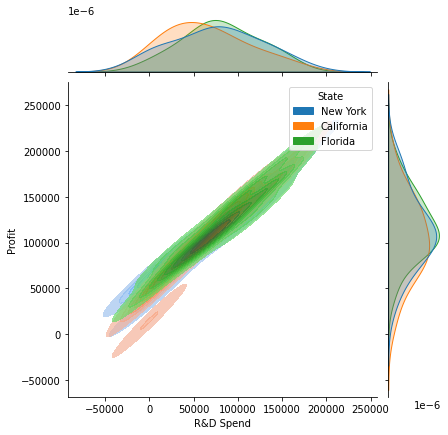

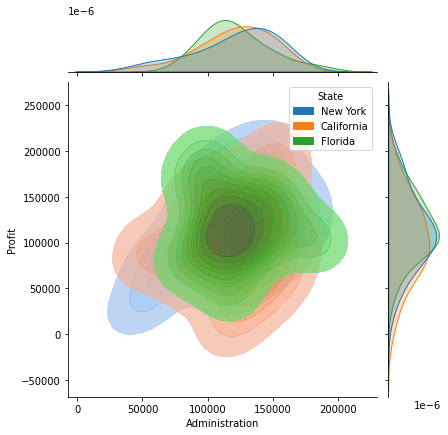

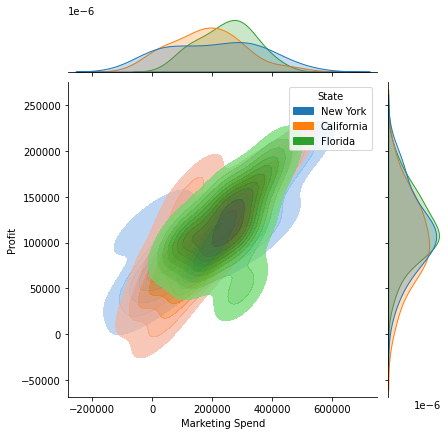

In [14]:
plt.figure(figsize=(10,10))
for col in df.iloc[:,0:-2]:
    sns.jointplot(data=df,x=f"{col}",y='Profit',hue='State',kind='kde',fill=True,joint_kws={'alpha': .7})

<Figure size 720x720 with 0 Axes>

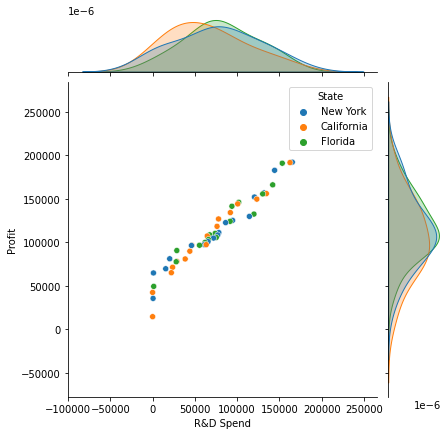

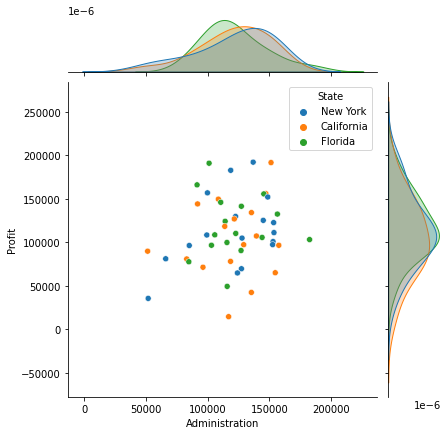

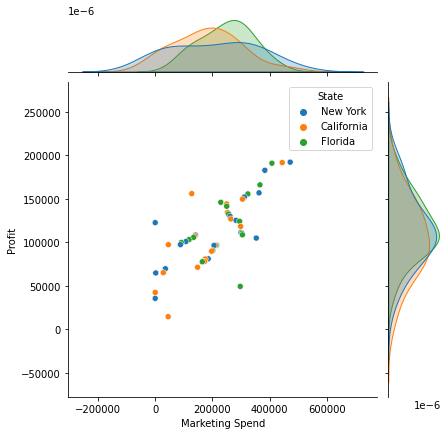

In [15]:
plt.figure(figsize=(10,10))
for col in df.iloc[:,0:-2]:
    sns.jointplot(data=df,x=f"{col}",y='Profit',hue='State',kind='scatter')

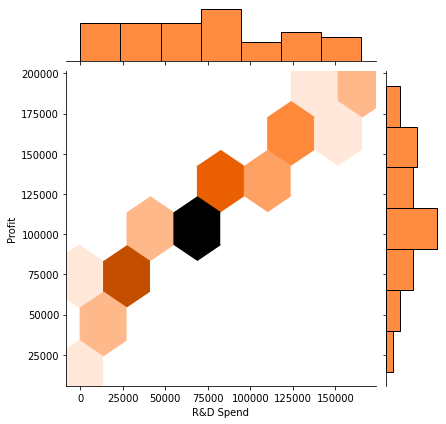

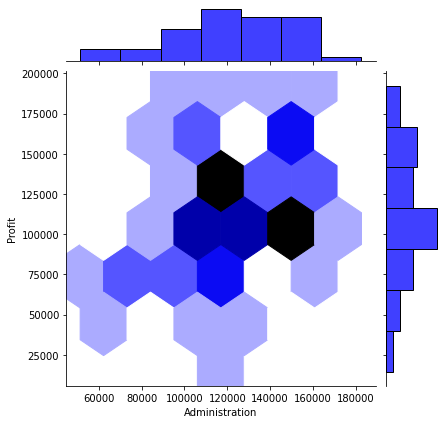

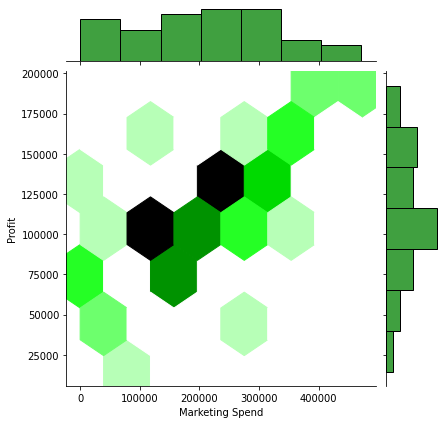

In [20]:
colName=df.iloc[:,0:-2].columns
colorName=['#ff6600','blue','green']
color={colName[i]:colorName[i] for i in range(3)}
for col in df.iloc[:,0:-2]:
    sns.jointplot(data=df,x=f"{col}",color=color[col],y='Profit',kind='hex')

[]

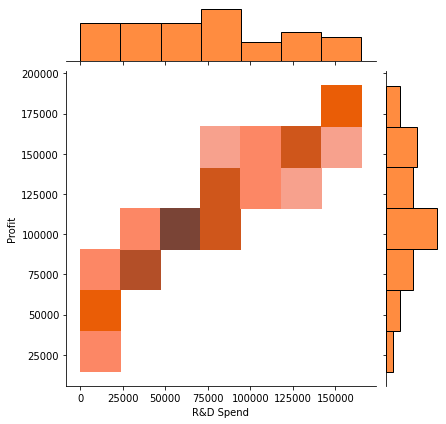

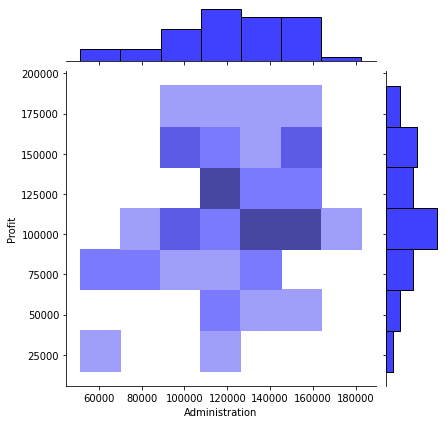

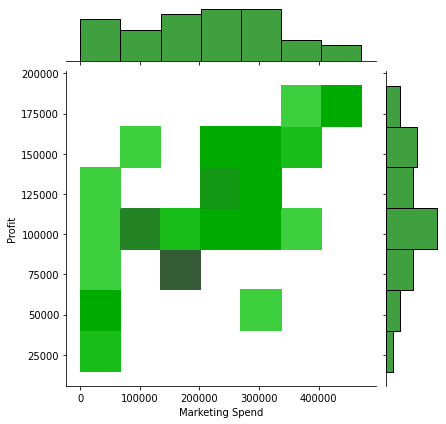

In [21]:
colName=df.iloc[:,0:-2].columns
colorName=['#ff6600','blue','green']
color={colName[i]:colorName[i] for i in range(3)}
for col in df.iloc[:,0:-2]:
    sns.jointplot(data=df,x=f"{col}",y='Profit',color=color[col],kind='hist')
plt.plot()

[]

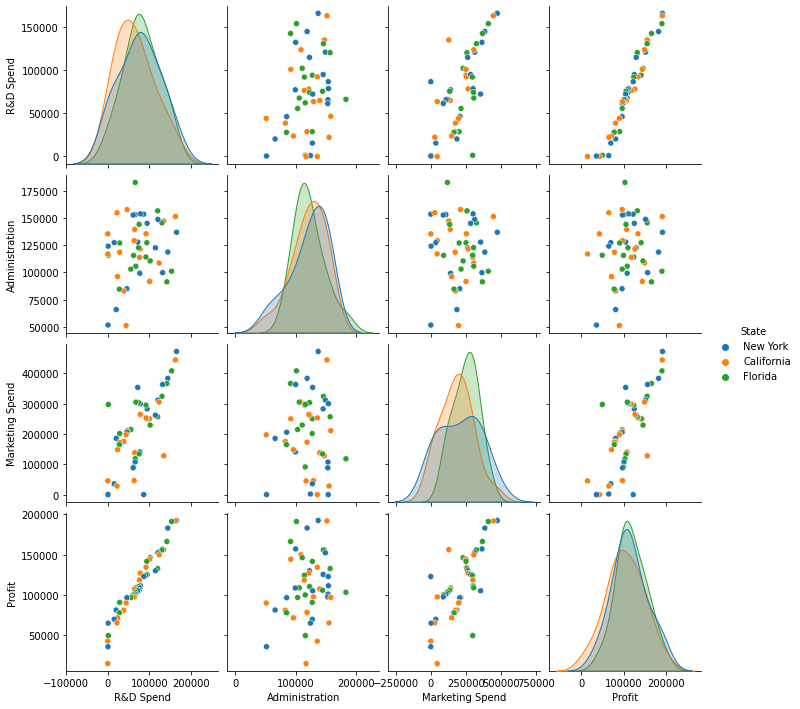

In [22]:
sns.pairplot(df,hue='State')
plt.plot()

## Spliting Datasets

In [23]:
# split datasets into independend and dependent(target) data
x=df2.drop('Profit',axis=1)
y=df2['Profit']

In [24]:
# Split into train and test data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

## Apply Machine Learning

In [25]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lr.score(xtrain,ytrain)

0.9537019995248526

In [27]:
lr.score(xtest,ytest)

0.8987266414328637

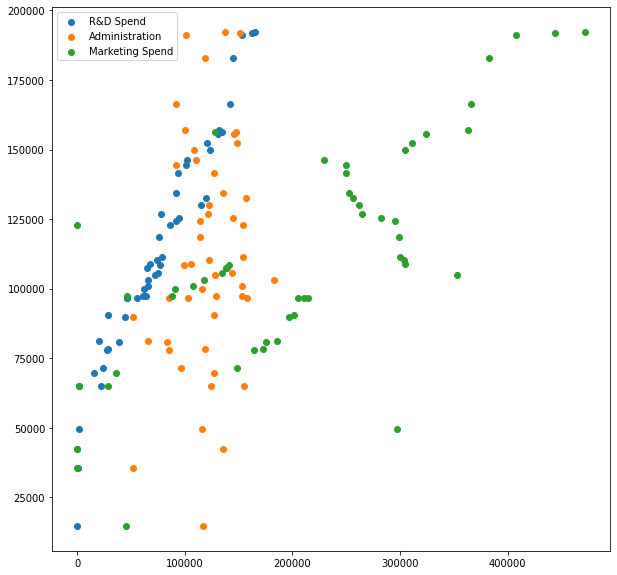

In [28]:
plt.figure(figsize=(10,10))
for col in df.iloc[:,:-2]:
    plt.scatter(x=df[col],y=df['Profit'],label=col)
    plt.legend()

<Figure size 720x720 with 0 Axes>

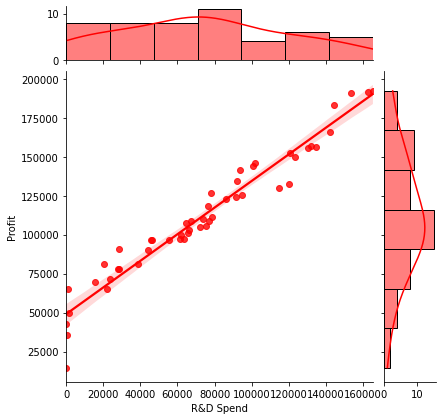

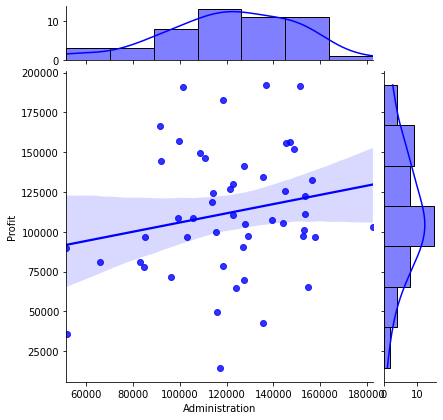

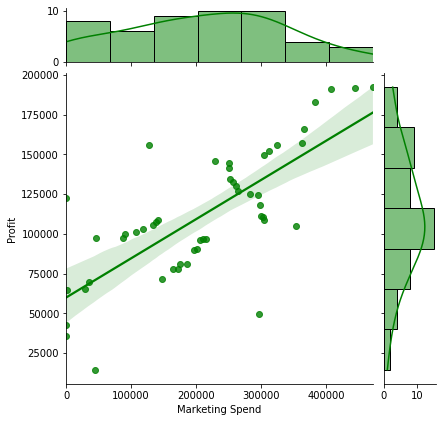

In [29]:
plt.figure(figsize=(10,10))
colName=df.iloc[:,0:-2].columns
colorName=['red','blue','green']
color={colName[i]:colorName[i] for i in range(3)}
for col in df.iloc[:,0:-2]:
    sns.jointplot(data=df,x=f"{col}",y='Profit',color=color[col],kind='reg',marginal_ticks=True)